In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("nuerobehavefact1.csv")
print(df.shape)

(550, 57)


In [ ]:
df.head()

,Age_Range,Gender,Division_ofOrigin,Current_EducationLevel,Employment_Status,Marital_Status,EatLess_OnWeightGain,EatLess_AtMealtime,RefuseFood_WeightConcern,Monitor_Food,...,Days_TriedLimitFoodToControlShapeOrWeight,Days_FastedToControlShapeOrWeight,Days_ExcludedFoodToControlShapeOrWeight,Days_FollowedRulesToControlShapeOrWeight,Days_FearLosingControlOverEating,Eat_SpecificFoodsHabitually,Location_TriggersHabitualEating,AutomaticEating_WhenExperiencingStrongEmotion,Realize_AfterEatingOutOfHabit,Perception_EatingDisorder
0,18-24,Male,Rajshahi,Bachelor's degree 3rd year,Student,In a relationship,Often,Never,Sometimes,Sometimes,...,13-27 days,Every day,1-12 days,Every day,1-12 days,Often,Often,Sometimes,Never,"Yes, I believe I do"
1,25-34,Female,Chattogram,Master's degree 2nd year,Self-employed,Married,Often,Often,Seldom,Often,...,1-12 days,13-27 days,13-27 days,No days,13-27 days,Often,Sometimes,Never,Never,"Yes, I believe I do"
2,18-24,Male,Khulna,Bachelor's degree 2nd year,Student,Single,Often,Never,Often,Seldom,...,Every day,1-12 days,1-12 days,13-27 days,1-12 days,Never,Sometimes,Never,Never,"Yes, I believe I do"
3,18-24,Female,Dhaka,Bachelor's degree 2nd year,Self-employed,Married,Often,Often,Never,Sometimes,...,Every day,1-12 days,Every day,1-12 days,1-12 days,Sometimes,Often,Often,Often,"Yes, I believe I do"
4,18-24,Male,Sylhet,Bachelor's degree 3rd year,Student,Single,Sometimes,Never,Seldom,Often,...,1-12 days,13-27 days,1-12 days,1-12 days,1-12 days,Often,Often,Seldom,Often,"Yes, I believe I do"


In [ ]:
# Emotional Eating Score
df["Emotional_Eating"] = df[
    ["Eat_WhenDepressedOrDiscouraged", "Eat_WhenLonely",
     "Eat_WhenAngry", "Eat_WhenAnxious", "Eat_WhenThingsGoWrong"]
].sum(axis=1)

# Body Dissatisfaction Score
df["Body_Dissatisfaction"] = df[
    ["Days_FeltFat", "Days_DissatisfiedWithShape",
     "Days_UncomfortableToSeeOwnBody", "Days_UncomfortableOthersSeeingYourShape"]
].sum(axis=1)

# Restrictive Behavior Score
df["Restrictive_Behavior"] = df[
    ["Days_TriedLimitFoodToControlShapeOrWeight",
     "Days_FastedToControlShapeOrWeight",
     "Days_ExcludedFoodToControlShapeOrWeight"]
].sum(axis=1)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X = df.drop("Perception_EatingDisorder", axis=1)
categorical_features = X.columns.tolist()
ct = ColumnTransformer(
    transformers=[
        ("nominal", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Transform
X_encoded = ct.fit_transform(X)

# Convert to DataFrame
X_df = pd.DataFrame(X_encoded.toarray(), columns=ct.get_feature_names_out())

print(X_df.shape)
X_df.head()

(550, 899)


,nominal__Age_Range_18-24,nominal__Age_Range_25-34,nominal__Gender_Female,nominal__Gender_Male,nominal__Division_ofOrigin_Barishal,nominal__Division_ofOrigin_Chattogram,nominal__Division_ofOrigin_Dhaka,nominal__Division_ofOrigin_Khulna,nominal__Division_ofOrigin_Mymensingh,nominal__Division_ofOrigin_Rajshahi,...,nominal__Restrictive_Behavior_No days13-27 daysEvery day,nominal__Restrictive_Behavior_No days13-27 daysNo days,nominal__Restrictive_Behavior_No daysEvery day1-12 days,nominal__Restrictive_Behavior_No daysEvery day13-27 days,nominal__Restrictive_Behavior_No daysEvery dayEvery day,nominal__Restrictive_Behavior_No daysEvery dayNo days,nominal__Restrictive_Behavior_No daysNo days1-12 days,nominal__Restrictive_Behavior_No daysNo days13-27 days,nominal__Restrictive_Behavior_No daysNo daysEvery day,nominal__Restrictive_Behavior_No daysNo daysNo days
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
missing = df.isnull().sum()
print("\n Missing values per column:\n", missing)


 Missing values per column:
 Age_Range                                        0
Gender                                           0
Division_ofOrigin                                0
Current_EducationLevel                           0
Employment_Status                                0
Marital_Status                                   0
EatLess_OnWeightGain                             0
EatLess_AtMealtime                               0
RefuseFood_WeightConcern                         0
Monitor_Food                                     0
Eat_SlimmingFoods                                0
EatLess_AfterOvereating                          0
EatLess_ToPreventWeightGain                      0
AvoidSnacks_BetweenMealsForWeightConcern         0
AvoidEveningEating_ForWeightConcern              0
ConsiderWeight_WhenEating                        0
Eat_WhenIrritated                                0
Eat_WhenUnoccupied                               0
Eat_WhenDepressedOrDiscouraged                   0
E

In [ ]:
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)

In [ ]:
if not missing.empty:
      plt.figure(figsize=(10, 5))
      sns.barplot(x=missing.values, y=missing.index, palette="viridis")
      plt.title("% Missing per Column")
      plt.xlabel("% Missing")
      plt.show()
else:
      print(" No missing values!")

 No missing values!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

In [ ]:
X = df.drop("Perception_EatingDisorder", axis=1)
y = df["Perception_EatingDisorder"].map(
      {v: idx for idx, v in enumerate(df["Perception_EatingDisorder"].unique())}
      )


In [ ]:
print(y.value_counts())

Perception_EatingDisorder
0    296
1    254
Name: count, dtype: int64


In [ ]:
nominal_cols = list(X.columns)
ct = ColumnTransformer([
    ('nominal', OneHotEncoder(drop='first'), nominal_cols)
    ])
X_encoded = ct.fit_transform(X)

In [ ]:
print(X_encoded.shape)

(550, 840)


In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

# Base model for RFE
xgb_selector = XGBClassifier(
    n_estimators=200, max_depth=5, learning_rate=0.1,
    use_label_encoder=False, eval_metric="logloss", random_state=42
)

# Select top 50 features (tune this number later)
rfe = RFE(estimator=xgb_selector, n_features_to_select=50, step=10)
rfe.fit(X_df, y)

# Keep only selected features
X_selected = X_df.loc[:, rfe.support_]

print("Shape after RFE feature selection:", X_selected.shape)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:44:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:44:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:44:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:44:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:44:05] WARNING: /w

Shape after RFE feature selection: (550, 50)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (440, 50) Test: (110, 50)


In [ ]:
#sel = VarianceThreshold(0.01)
#X_sel = sel.fit_transform(X_encoded)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(
 #     X_sel, y, test_size=0.2, stratify=y, random_state=42
#)
#print("Train:", X_train.shape, "Test:", X_test.shape)

In [ ]:
# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Class balance in train set:", np.bincount(y_train))

# --- Choose ONE imbalance handling method ---

# ✅ Option 1: scale_pos_weight (recommended for slight imbalance)
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print("scale_pos_weight =", scale_pos_weight)

# ✅ Option 2: ADASYN (if you prefer oversampling)
#from imblearn.over_sampling import ADASYN
#adasyn = ADASYN(random_state=42)
#X_train, y_train = adasyn.fit_resample(X_train, y_train)

# ✅ Option 3: SMOTEENN (hybrid method)
#from imblearn.combine import SMOTEENN
#smote_enn = SMOTEENN(random_state=42)
#X_train, y_train = smote_enn.fit_resample(X_train, y_train)


Train: (440, 50) Test: (110, 50)
Class balance in train set: [237 203]
scale_pos_weight = 1.167487684729064


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
rf_pipeline = ImbPipeline([
      ('smote', SMOTE(random_state=42)),
      ('rf', RandomForestClassifier(random_state=42))

])
rf_param_dist = {
      'rf__n_estimators': [100, 200, 300],
      'rf__max_depth': [None, 10, 20, 30],
      'rf__min_samples_split': [2, 5, 10],
      'rf__min_samples_leaf': [1, 2, 4],
      'rf__max_features': ['sqrt', 'log2']
}
rf_rand_search = RandomizedSearchCV(
      estimator=rf_pipeline,
      param_distributions=rf_param_dist,
      n_iter=20,
      cv=cv,
      scoring='roc_auc',
      n_jobs=-1,
      verbose=2,
      random_state=42
)
rf_rand_search.fit(X_train, y_train)
rf_best = rf_rand_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
X_train_dense = X_train.values
X_test_dense = X_test.values

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_dense, y_train)
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)
y_pred_nb = nb_model.predict(X_test_dense)
y_prob_nb = nb_model.predict_proba(X_test_dense)[:, 1]


In [ ]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Class balance in train set:", np.bincount(y_train))

# --- Handle imbalance ---
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print("scale_pos_weight =", scale_pos_weight)

# --- Define 10-fold Stratified CV ---
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# --- Define scorers ---
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "roc_auc": "roc_auc",
    "f1": make_scorer(f1_score)
}

# --- Baseline XGBoost before tuning ---
from xgboost import XGBClassifier

baseline_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

cv_results = cross_validate(
    baseline_model, X_train, y_train,
    cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)

print("\n=== Baseline 10-Fold CV ===")
print("Accuracy: %.3f ± %.3f" % (cv_results["test_accuracy"].mean(), cv_results["test_accuracy"].std()))
print("ROC AUC : %.3f ± %.3f" % (cv_results["test_roc_auc"].mean(), cv_results["test_roc_auc"].std()))
print("F1 Score: %.3f ± %.3f" % (cv_results["test_f1"].mean(), cv_results["test_f1"].std()))


Train: (440, 50) Test: (110, 50)
Class balance in train set: [237 203]
scale_pos_weight = 1.167487684729064

=== Baseline 10-Fold CV ===
Accuracy: 0.800 ± 0.068
ROC AUC : 0.892 ± 0.057
F1 Score: 0.787 ± 0.065


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 14.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade xgboost


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np

# ✅ Instead of SMOTE, use scale_pos_weight to handle imbalance
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)

# ✅ Stratified 10-fold CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define Optuna objective
def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "tree_method": "hist",
        "scale_pos_weight": scale_pos_weight,
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 7),
        "gamma": trial.suggest_float("gamma", 0.0, 0.5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 2.0)
    }

    model = XGBClassifier(**params, use_label_encoder=False, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
    return scores.mean()

# ✅ Run Optuna search
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, n_jobs=-1)

print("Best trial parameters:", study.best_trial.params)

# ✅ Train final model with best params
best_params = study.best_trial.params
xgb_best = XGBClassifier(
    **best_params,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

xgb_best = XGBClassifier(
    **best_params,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

xgb_best.fit(X_train, y_train)

y_pred = xgb_best.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))



# ✅ Evaluate
y_pred = xgb_best.predict(X_test)
y_prob = xgb_best.predict_proba(X_test)[:, 1]

print("\n=== XGBoost with Optuna ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


[I 2025-08-23 12:45:35,040] A new study created in memory with name: no-name-648d7283-fd7f-4b33-8d84-580c51d4c7f3


scale_pos_weight: 1.167487684729064


[I 2025-08-23 12:45:41,163] Trial 0 finished with value: 0.8889428053830228 and parameters: {'n_estimators': 446, 'max_depth': 10, 'learning_rate': 0.01882848036843987, 'subsample': 0.7314733744617127, 'colsample_bytree': 0.7314847356181571, 'min_child_weight': 5, 'gamma': 0.10075797097379169, 'reg_alpha': 0.7436554858730736, 'reg_lambda': 1.8646044408353601}. Best is trial 0 with value: 0.8889428053830228.
[I 2025-08-23 12:45:42,073] Trial 1 finished with value: 0.8766692546583851 and parameters: {'n_estimators': 540, 'max_depth': 8, 'learning_rate': 0.004823318149864087, 'subsample': 0.8808502375925472, 'colsample_bytree': 0.8150337439061277, 'min_child_weight': 1, 'gamma': 0.22874540406867988, 'reg_alpha': 0.9643357715778732, 'reg_lambda': 0.6285129097348714}. Best is trial 0 with value: 0.8889428053830228.
[I 2025-08-23 12:45:49,705] Trial 2 finished with value: 0.8725051759834368 and parameters: {'n_estimators': 635, 'max_depth': 9, 'learning_rate': 0.0028363120719149208, 'subsamp

Best trial parameters: {'n_estimators': 571, 'max_depth': 5, 'learning_rate': 0.09025906546227933, 'subsample': 0.6581620510268604, 'colsample_bytree': 0.9230689266826393, 'min_child_weight': 7, 'gamma': 0.4235847471811504, 'reg_alpha': 0.5439407202538112, 'reg_lambda': 1.84568196464522}
Final Accuracy: 0.8181818181818182

=== XGBoost with Optuna ===
Accuracy: 0.8181818181818182
F1 Score: 0.8148148148148148
ROC AUC: 0.9212362911266201


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ("xgb", xgb_best),
    ("rf", RandomForestClassifier(n_estimators=500, random_state=42)),
    ("nb", GaussianNB())
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=XGBClassifier(
        **best_params,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ),
    cv=5,
    n_jobs=-1
)

stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:49:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Stacking Accuracy: 0.8


In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.05, max_depth=8, random_state=42)
lgbm.fit(X_train, y_train)
print("LGBM Accuracy:", accuracy_score(y_test, lgbm.predict(X_test)))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 203, number of negative: 237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 440, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461364 -> initscore=-0.154854
[LightGBM] [Info] Start training from score -0.154854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Base models
rf_model = RandomForestClassifier(
    n_estimators=300, max_depth=10, random_state=42
)

xgb_model = xgb_best  # your tuned XGBoost from Optuna

# Final meta-learner (Naive Bayes)
nb_model = GaussianNB()

# Stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[("xgb", xgb_model), ("rf", rf_model)],
    final_estimator=nb_model,
    cv=5,
    n_jobs=-1,
    stack_method="predict_proba"  # use probabilities for meta-learner
)

# Train
stacking_clf.fit(X_train, y_train)

# Evaluate
y_pred_stack = stacking_clf.predict(X_test)
y_prob_stack = stacking_clf.predict_proba(X_test)[:, 1]

print("\n=== Stacking Ensemble (XGB + RF + NB) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("F1 Score:", f1_score(y_test, y_pred_stack))
print("ROC AUC:", roc_auc_score(y_test, y_prob_stack))



=== Stacking Ensemble (XGB + RF + NB) ===
Accuracy: 0.8090909090909091
F1 Score: 0.8037383177570093
ROC AUC: 0.9102691924227319


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[("xgb", xgb_model), ("rf", rf_model), ("nb", nb_model)],
    voting="soft",
    n_jobs=-1
)

# Train
voting_clf.fit(X_train, y_train)

# Evaluate
y_pred_vote = voting_clf.predict(X_test)
y_prob_vote = voting_clf.predict_proba(X_test)[:, 1]

print("\n=== Voting Classifier (XGB + RF + NB) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print("F1 Score:", f1_score(y_test, y_pred_vote))
print("ROC AUC:", roc_auc_score(y_test, y_prob_vote))



=== Voting Classifier (XGB + RF + NB) ===
Accuracy: 0.8272727272727273
F1 Score: 0.8347826086956521
ROC AUC: 0.910601528747092


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score

print("=== Naive Bayes Metrics ===")
print(classification_report(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_nb))

# ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# PR
prec_nb, rec_nb, _ = precision_recall_curve(y_test, y_prob_nb)
avg_prec_nb = average_precision_score(y_test, y_prob_nb)

=== Naive Bayes Metrics ===
              precision    recall  f1-score   support

           0       0.93      0.64      0.76        59
           1       0.70      0.94      0.80        51

    accuracy                           0.78       110
   macro avg       0.81      0.79      0.78       110
weighted avg       0.82      0.78      0.78       110

ROC AUC: 0.8933200398803589


In [ ]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:, 1]

print("=== Random Forest Metrics ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


=== Random Forest Metrics ===
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        59
           1       0.79      0.82      0.81        51

    accuracy                           0.82       110
   macro avg       0.82      0.82      0.82       110
weighted avg       0.82      0.82      0.82       110

Confusion Matrix:
 [[48 11]
 [ 9 42]]
ROC AUC: 0.905284147557328


In [ ]:
from sklearn.metrics import classification_report
y_pred = xgb_best.predict(X_test)
y_prob = xgb_best.predict_proba(X_test)[:, 1]
print("\n=== XGBoost with Optuna ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No_Disorder", "Disorder"]))



=== XGBoost with Optuna ===
Accuracy: 0.8181818181818182
F1 Score: 0.8148148148148148
ROC AUC: 0.9212362911266201

Classification Report:
              precision    recall  f1-score   support

 No_Disorder       0.87      0.78      0.82        59
    Disorder       0.77      0.86      0.81        51

    accuracy                           0.82       110
   macro avg       0.82      0.82      0.82       110
weighted avg       0.82      0.82      0.82       110



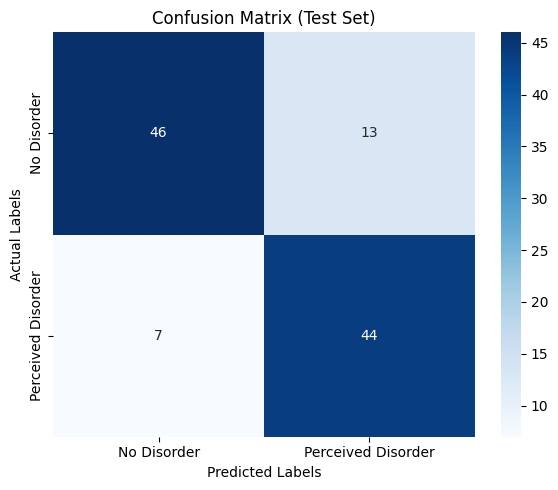

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


class_names = ['No Disorder', 'Perceived Disorder']


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)


plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


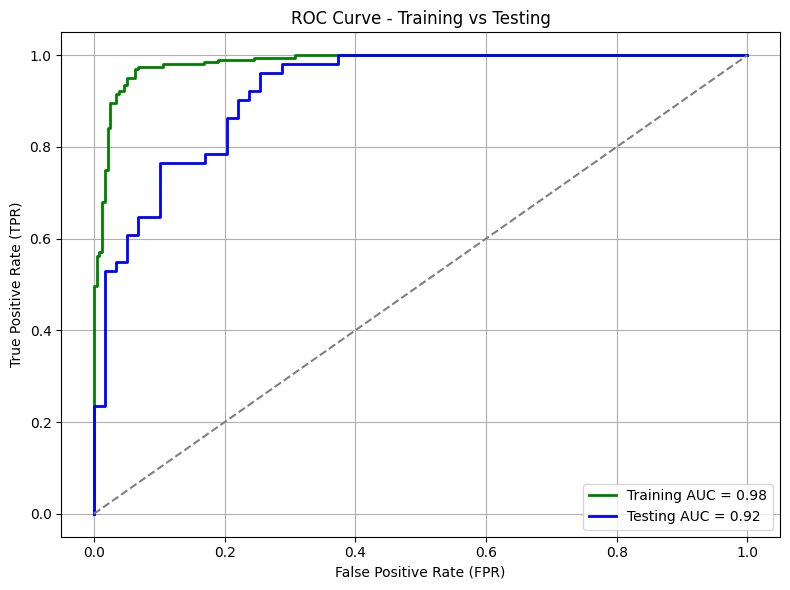

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt


y_train_prob = xgb_best.predict_proba(X_train)[:, 1]
y_test_prob = xgb_best.predict_proba(X_test)[:, 1]


fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)


fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)


plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Testing AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Training vs Testing')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


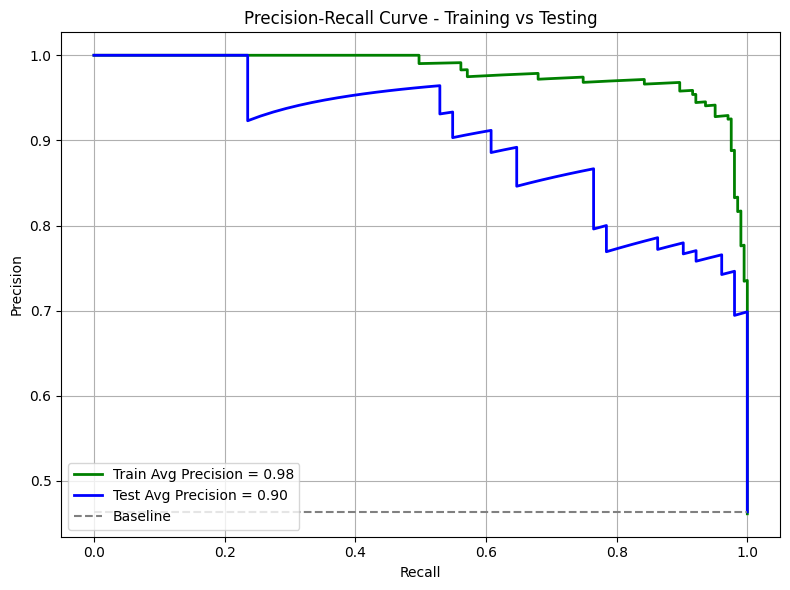

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


y_train_prob = xgb_best.predict_proba(X_train)[:, 1]
y_test_prob = xgb_best.predict_proba(X_test)[:, 1]


precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob)


avg_prec_train = average_precision_score(y_train, y_train_prob)
avg_prec_test = average_precision_score(y_test, y_test_prob)


plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, color='green', lw=2, label=f'Train Avg Precision = {avg_prec_train:.2f}')
plt.plot(recall_test, precision_test, color='blue', lw=2, label=f'Test Avg Precision = {avg_prec_test:.2f}')


plt.hlines(y=sum(y_test) / len(y_test), xmin=0, xmax=1, colors='gray', linestyles='--', label='Baseline')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Training vs Testing')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


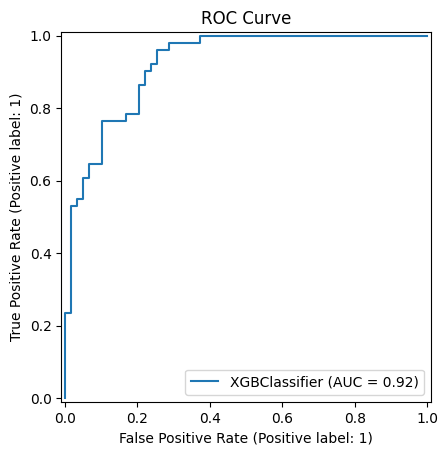

In [ ]:
RocCurveDisplay.from_estimator(xgb_best, X_test, y_test)
plt.title("ROC Curve")
plt.show()

In [ ]:
# Predict probabilities from XGBoost
y_prob_xgb = xgb_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

In [ ]:
from sklearn.metrics import roc_curve, auc

# Random Forest ROC and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_xgb_optuna = xgb_best.predict_proba(X_test)[:, 1]
fpr_xgb_optuna, tpr_xgb_optuna, _ = roc_curve(y_test, y_prob_xgb_optuna)
auc_xgb_optuna = roc_auc_score(y_test, y_prob_xgb_optuna)


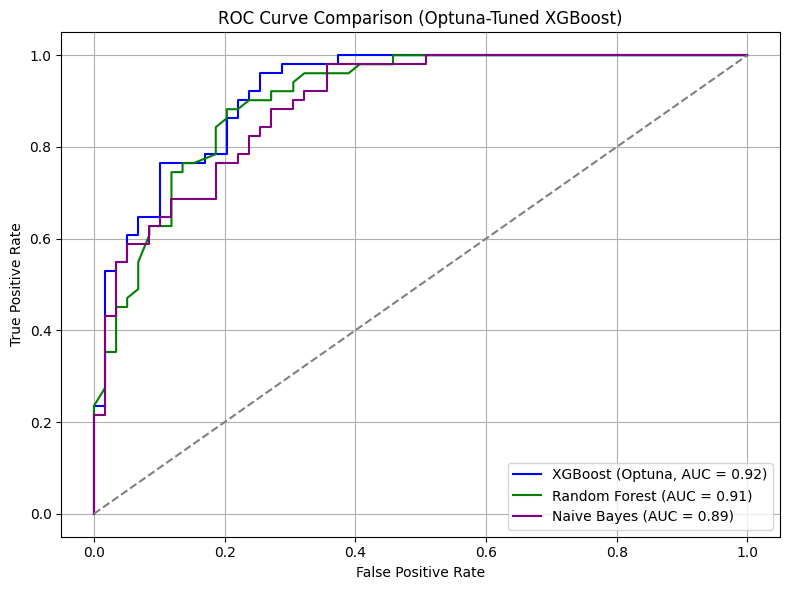

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# ✅ Optuna-tuned XGBoost
plt.plot(fpr_xgb_optuna, tpr_xgb_optuna,
         label=f"XGBoost (Optuna, AUC = {auc_xgb_optuna:.2f})", color="blue")

# ✅ Random Forest
plt.plot(fpr_rf, tpr_rf,
         label=f"Random Forest (AUC = {auc_rf:.2f})", color="green")

# ✅ Naive Bayes
plt.plot(fpr_nb, tpr_nb,
         label=f"Naive Bayes (AUC = {auc_nb:.2f})", color="purple")

# ✅ Diagonal baseline
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# ✅ Labels and style
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Optuna-Tuned XGBoost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


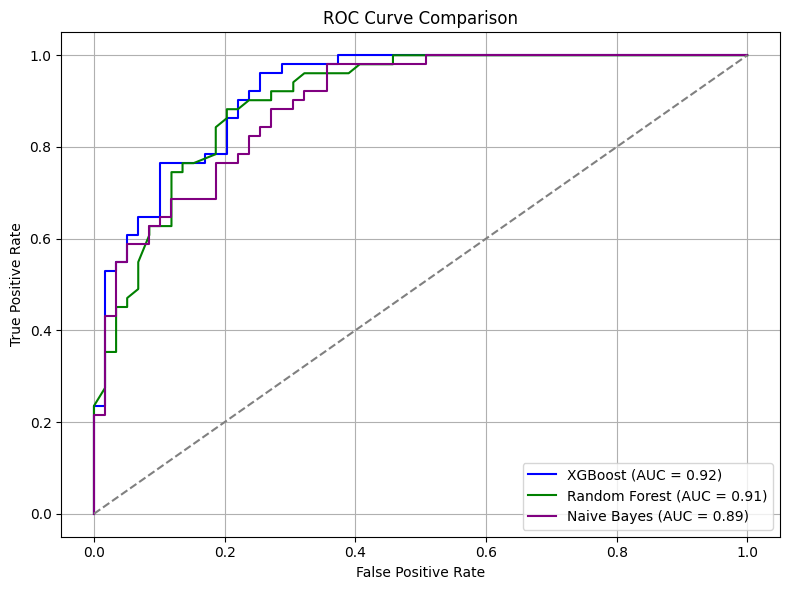

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# XGBoost Precision-Recall
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
avg_prec_xgb = average_precision_score(y_test, y_prob_xgb)


In [ ]:
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
avg_prec_rf = average_precision_score(y_test, y_prob_rf)


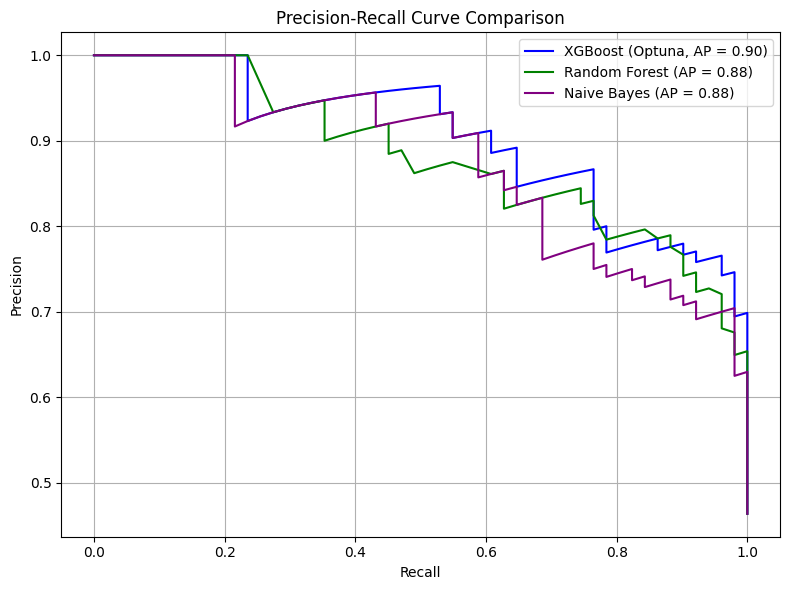

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ✅ Precision-Recall for Optuna-tuned XGBoost
prec_xgb_optuna, rec_xgb_optuna, _ = precision_recall_curve(y_test, y_prob_xgb_optuna)
avg_prec_xgb_optuna = average_precision_score(y_test, y_prob_xgb_optuna)

# ✅ Naive Bayes (already computed above)
prec_nb, rec_nb, _ = precision_recall_curve(y_test, y_prob_nb)
avg_prec_nb = average_precision_score(y_test, y_prob_nb)

# ✅ Plot
plt.figure(figsize=(8, 6))

plt.plot(rec_xgb_optuna, prec_xgb_optuna,
         label=f"XGBoost (Optuna, AP = {avg_prec_xgb_optuna:.2f})", color="blue")

plt.plot(rec_rf, prec_rf,
         label=f"Random Forest (AP = {avg_prec_rf:.2f})", color="green")

plt.plot(rec_nb, prec_nb,
         label=f"Naive Bayes (AP = {avg_prec_nb:.2f})", color="purple")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


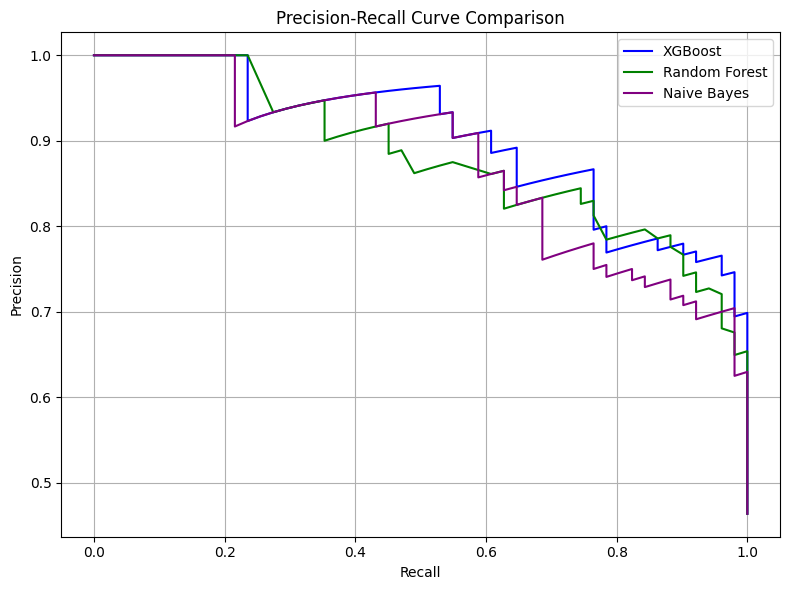

In [ ]:
prec_nb, rec_nb, _ = precision_recall_curve(y_test, y_prob_nb)
avg_prec_nb = average_precision_score(y_test, y_prob_nb)

plt.figure(figsize=(8, 6))
plt.plot(rec_xgb, prec_xgb, label="XGBoost", color='blue')
plt.plot(rec_rf, prec_rf, label="Random Forest", color='green')
plt.plot(rec_nb, prec_nb, label="Naive Bayes", color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(xgb_best, X_df, y, cv=cv, scoring="roc_auc")
print("Cross-val AUC:", np.round(cv_auc.mean(), 4))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:49:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:49:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:49:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:49:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:49:43] WARNING: /w

Cross-val AUC: 0.9035


                                              feature  importance
28  nominal__Days_WeightAffectedSelfJudgment_1-12 ...        83.0
27                    nominal__Days_FeltFat_1-12 days        78.0
34  nominal__Days_UncomfortableToSeeOwnBody_1-12 days        59.0
32      nominal__Days_DissatisfiedWithShape_1-12 days        54.0
36  nominal__Days_UncomfortableOthersSeeingYourSha...        52.0
38  nominal__Days_ExcludedFoodToControlShapeOrWeig...        51.0
31     nominal__Days_DissatisfiedWithWeight_1-12 days        49.0
20  nominal__EatMore_IfFoodSmellsOrLooksGood_Somet...        48.0
40     nominal__Eat_SpecificFoodsHabitually_Sometimes        48.0
7            nominal__ConsiderWeight_WhenEating_Often        47.0
3              nominal__EatLess_AfterOvereating_Often        47.0
17               nominal__Eat_WhenThingsGoWrong_Often        46.0
15                     nominal__Eat_WhenAnxious_Often        44.0
41  nominal__Location_TriggersHabitualEating_Somet...        44.0
30  nomina

/tmp/ipython-input-3282505503.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


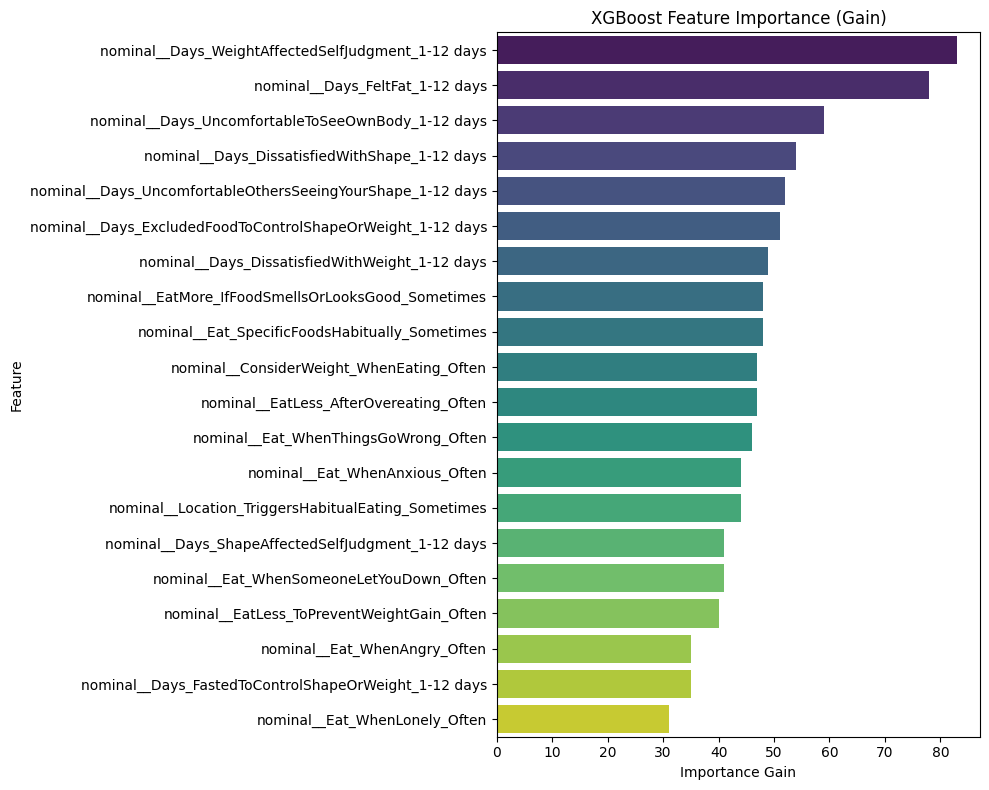

In [ ]:
importance = xgb_best.get_booster().get_score(importance_type="weight")
importance_df = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values(by='importance', ascending=False).head(20)

print(importance_df)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title("XGBoost Feature Importance (Gain)")
plt.xlabel("Importance Gain")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# If xgb_best is directly an XGBClassifier (not pipeline)
xgb_model = xgb_best

# Convert DataFrames to numpy arrays
X_train_dense = X_train.values
X_test_dense = X_test.values


In [ ]:
feature_names = list(X_train.columns)
# --- Create shortcuts automatically ---
# Example: take only last part after '__' and truncate long ones
short_feature_names = [
    name.split("__")[-1][:15] + (".." if len(name.split("__")[-1]) > 15 else "")
    for name in feature_names
]

# Map full name → short name
name_map = dict(zip(feature_names, short_feature_names))

# SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_dense)
shap_values = explainer(X_test_dense)


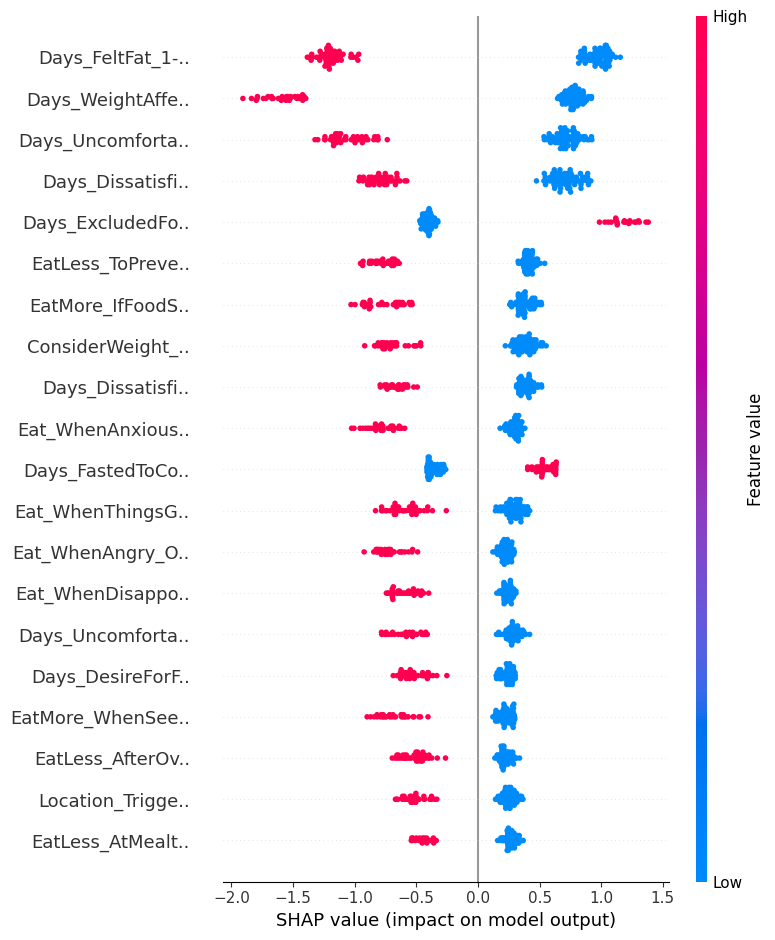

In [ ]:
shap.summary_plot(
    shap_values,
    features=X_test_dense,
    feature_names=short_feature_names,  # use short names
    show=True
)

Top 3 important features for dependence plots: ['nominal__Days_FeltFat_1-12 days', 'nominal__Days_WeightAffectedSelfJudgment_1-12 days', 'nominal__Days_UncomfortableOthersSeeingYourShape_1-12 days']


<Figure size 700x500 with 0 Axes>

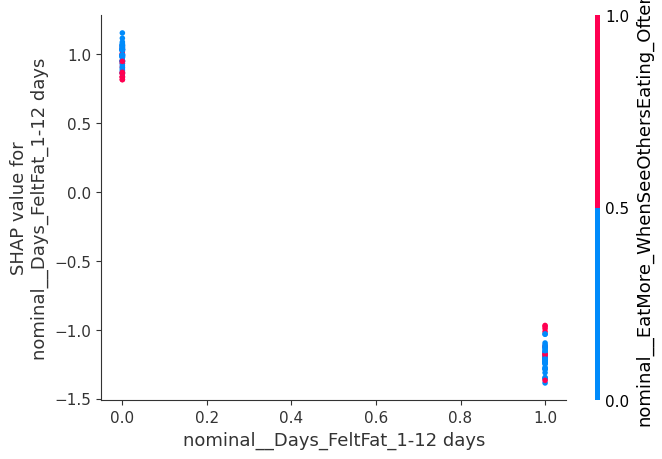

<Figure size 700x500 with 0 Axes>

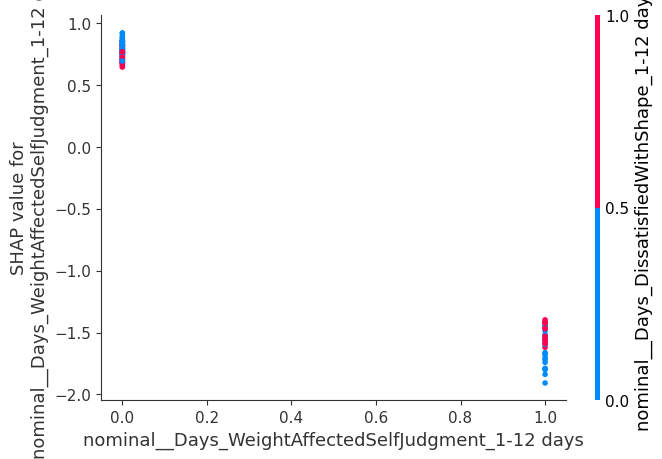

<Figure size 700x500 with 0 Axes>

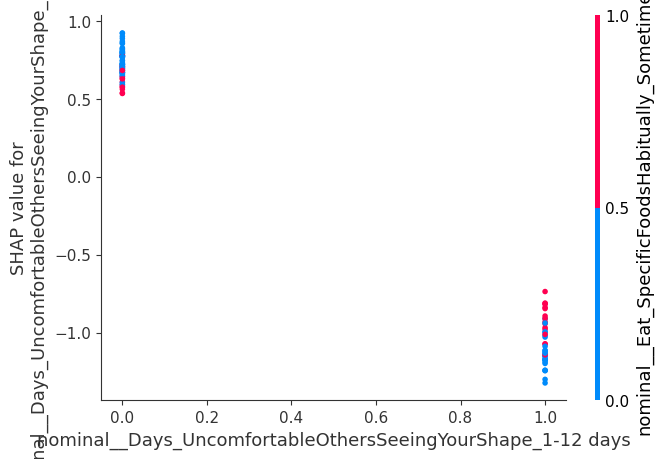

In [ ]:
# --- Top 3 features by mean absolute SHAP value ---
shap_importance = np.abs(shap_values.values).mean(axis=0)
top3_idx = np.argsort(shap_importance)[-3:][::-1]
top3_features = [feature_names[i] for i in top3_idx]

print("Top 3 important features for dependence plots:", top3_features)

# --- Plot dependence for each top feature ---
for feat in top3_idx:
    plt.figure(figsize=(7, 5))
    shap.dependence_plot(
        feat,
        shap_values.values,
        X_test_dense,
        feature_names=feature_names,
        show=True
    )

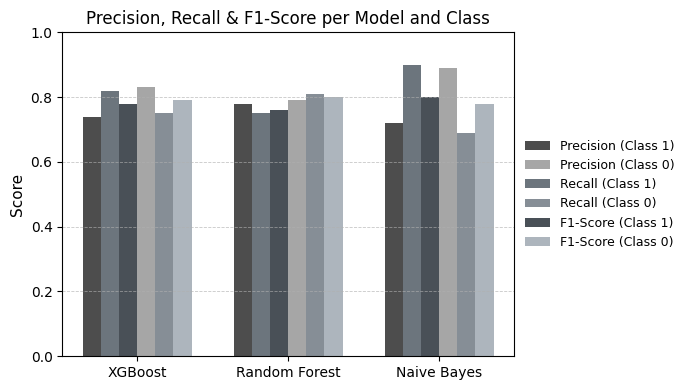

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["XGBoost", "Random Forest", "Naive Bayes"]

# Per-class metrics
precision = {
    "Class 1": [0.74, 0.78, 0.72],
    "Class 0": [0.83, 0.79, 0.89]
}
recall = {
    "Class 1": [0.82, 0.75, 0.90],
    "Class 0": [0.75, 0.81, 0.69]
}
f1 = {
    "Class 1": [0.78, 0.76, 0.80],
    "Class 0": [0.79, 0.80, 0.78]
}

# Organize data
metrics = ["Precision", "Recall", "F1-Score"]
class1_vals = [precision["Class 1"], recall["Class 1"], f1["Class 1"]]
class0_vals = [precision["Class 0"], recall["Class 0"], f1["Class 0"]]

x = np.arange(len(models))  # positions for models
width = 0.12  # bar width

# Muted academic color palette
colors_class1 = ["#4d4d4d", "#6c757d", "#495057"]  # grayscale for Class 1
colors_class0 = ["#a6a6a6", "#868e96", "#adb5bd"]  # lighter grayscale for Class 0

plt.figure(figsize=(7,4))  # a bit wider to fit legend

# Plot each metric for both classes
for i, metric in enumerate(metrics):
    plt.bar(x + (i-1.5)*width, class1_vals[i], width,
            label=f"{metric} (Class 1)", color=colors_class1[i])
    plt.bar(x + (i-1.5)*width + 3*width, class0_vals[i], width,
            label=f"{metric} (Class 0)", color=colors_class0[i])

# Styling for publication
plt.xticks(x + width, models, fontsize=10)
plt.ylabel("Score", fontsize=11)
plt.ylim(0,1)
plt.title("Precision, Recall & F1-Score per Model and Class", fontsize=12)

# Minimalist grid
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7)

# Legend placed on the right side, line-wise
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


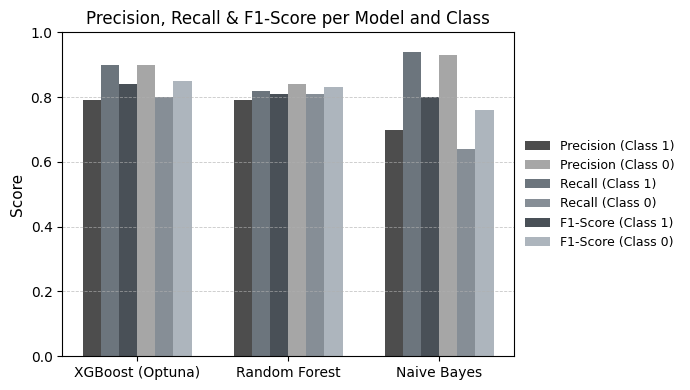

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["XGBoost (Optuna)", "Random Forest", "Naive Bayes"]

# Per-class metrics (updated with actual results)
precision = {
    "Class 1": [0.79, 0.79, 0.70],
    "Class 0": [0.90, 0.84, 0.93]
}
recall = {
    "Class 1": [0.90, 0.82, 0.94],
    "Class 0": [0.80, 0.81, 0.64]
}
f1 = {
    "Class 1": [0.84, 0.81, 0.80],
    "Class 0": [0.85, 0.83, 0.76]
}

# Organize data
metrics = ["Precision", "Recall", "F1-Score"]
class1_vals = [precision["Class 1"], recall["Class 1"], f1["Class 1"]]
class0_vals = [precision["Class 0"], recall["Class 0"], f1["Class 0"]]

x = np.arange(len(models))  # positions for models
width = 0.12  # bar width

# Muted academic color palette
colors_class1 = ["#4d4d4d", "#6c757d", "#495057"]  # grayscale for Class 1
colors_class0 = ["#a6a6a6", "#868e96", "#adb5bd"]  # lighter grayscale for Class 0

plt.figure(figsize=(7,4))  # a bit wider to fit legend

# Plot each metric for both classes
for i, metric in enumerate(metrics):
    plt.bar(x + (i-1.5)*width, class1_vals[i], width,
            label=f"{metric} (Class 1)", color=colors_class1[i])
    plt.bar(x + (i-1.5)*width + 3*width, class0_vals[i], width,
            label=f"{metric} (Class 0)", color=colors_class0[i])

# Styling for publication
plt.xticks(x + width, models, fontsize=10)
plt.ylabel("Score", fontsize=11)
plt.ylim(0,1)
plt.title("Precision, Recall & F1-Score per Model and Class", fontsize=12)

# Minimalist grid
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7)

# Legend placed on the right side, line-wise
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


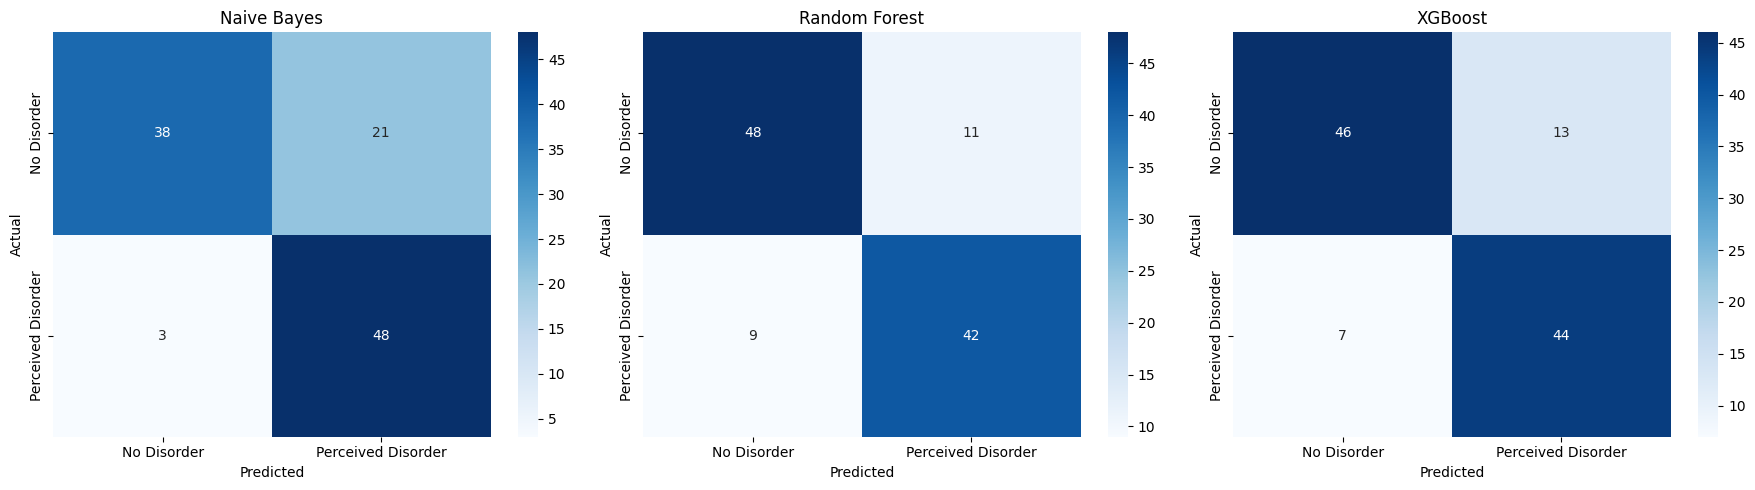

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred)

class_names = ['No Disorder', 'Perceived Disorder']

# Plot all three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Naive Bayes")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_title("XGBoost")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()
